In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

import matplotlib.pyplot as plt
% matplotlib inline
import datetime
import calendar
import seaborn as sns

## Setting the datetime format while importing data

In [2]:
fmt = '%Y-%m-%d %H:%M:%S'
dateparse = lambda dates: pd.datetime.strptime(dates, fmt)
rawautodf = pd.read_csv('used-cars-database/autos.csv', sep=',',encoding='Latin1',parse_dates = ['dateCrawled','dateCreated','lastSeen'], date_parser = dateparse)

## Clean up

In [3]:
print( "Size of the dataset - " + str(len(rawautodf)))

#drop name
autodf = rawautodf.drop('name',axis = 1)

#We can live without the 3 gewerblich. Let's analyze the data with only the private sellers
autodf = autodf[autodf['seller'] != 'gewerblich']
autodf = autodf.drop('seller',axis = 1)

#Same here. Let's drop the 12
autodf = autodf[autodf['offerType'] != 'Gesuch']
autodf = autodf.drop('offerType',axis = 1)

#Let's drop the cars that are either too cheap of too expensive
autodf = autodf[autodf.price > 100]
autodf = autodf[autodf.price < 150000]

#Drop abtest (don't know what it means)
autodf = autodf.drop('abtest',1)

# I only want to consier for 1980 to 2017 year of registration
autodf = autodf[(autodf.yearOfRegistration >= 1990) & (autodf.yearOfRegistration < 2017)]

#Only consider between 50 and 300 powerPS
autodf = autodf[(autodf.powerPS <= 300) & (autodf.powerPS > 50)]

autodf.gearbox = autodf.gearbox.astype('category')
autodf.model = autodf.model.astype('category')
autodf.vehicleType = autodf.vehicleType.astype('category')
autodf.monthOfRegistration = autodf.monthOfRegistration.astype('category')
autodf.fuelType = autodf.fuelType.astype('category')

print( "Size of the dataset - " + str(len(autodf)))

Size of the dataset - 371528
Size of the dataset - 289000


In [4]:
#autodf.corr()
autodf.head(1)

,dateCrawled,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
1,2016-03-24 10:58:45,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50


### Let's compare see the trends with the year of registration

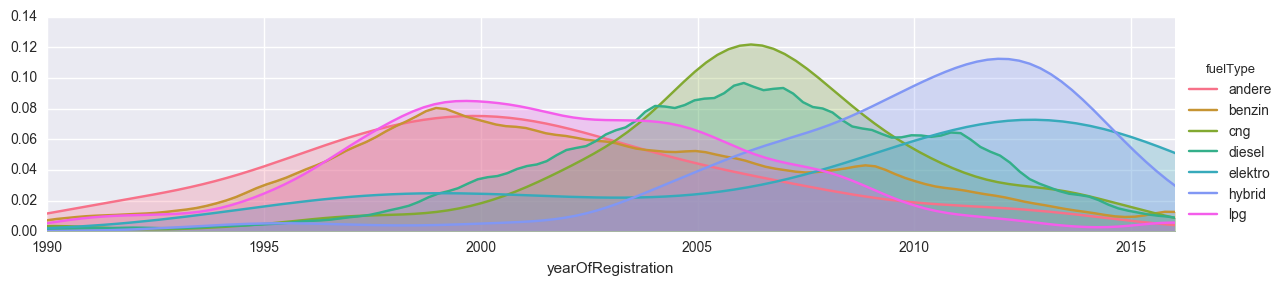

In [11]:
fig = sns.FacetGrid(autodf,hue='fuelType',aspect=4)
fig.map(sns.kdeplot,'yearOfRegistration',shade=True)

oldest = autodf['yearOfRegistration'].max()
newest = autodf['yearOfRegistration'].min()

fig.set(xlim=(newest,oldest))

fig.add_legend()

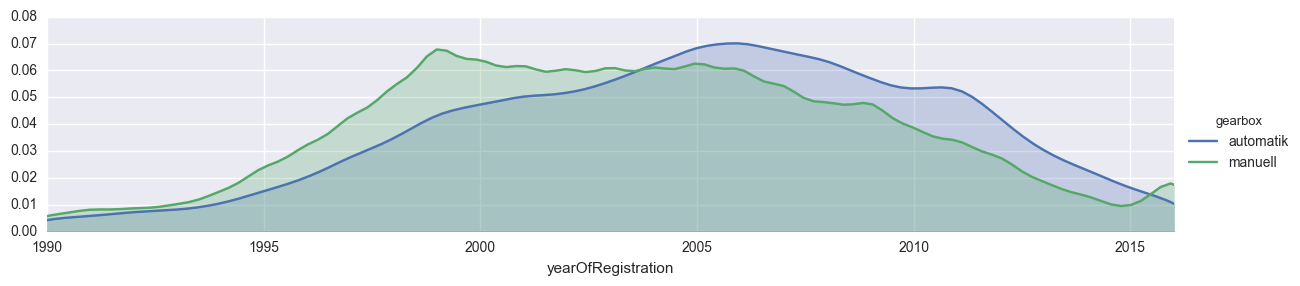

In [13]:
fig = sns.FacetGrid(autodf,hue='gearbox',aspect=4)
fig.map(sns.kdeplot,'yearOfRegistration',shade=True)

oldest = autodf['yearOfRegistration'].max()
newest = autodf['yearOfRegistration'].min()

fig.set(xlim=(newest,oldest))

fig.add_legend()

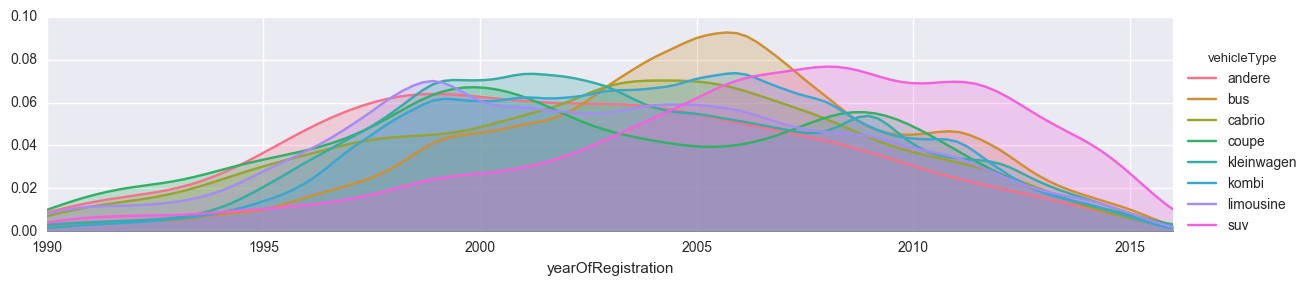

In [15]:
fig = sns.FacetGrid(autodf,hue='vehicleType',aspect=4)
fig.map(sns.kdeplot,'yearOfRegistration',shade=True)

oldest = autodf['yearOfRegistration'].max()
newest = autodf['yearOfRegistration'].min()

fig.set(xlim=(newest,oldest))

fig.add_legend()

[u'volkswagen',
 u'bmw',
 u'opel',
 u'mercedes_benz',
 u'audi',
 u'ford',
 u'renault',
 u'peugeot',
 u'fiat',
 u'seat']